In [378]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

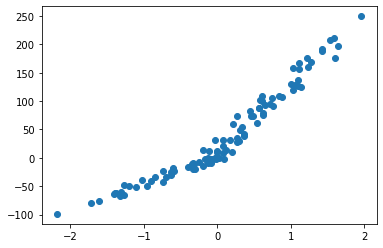

In [417]:

x, y = make_regression(n_samples=100, n_features=1, noise = 10) # creation d'un dataset (x, y) linéaire
y = y + abs(y/2) # modifie les valeurs de y pour rendre le dataset non-linéaire
plt.scatter(x, y) # afficher les résultats. x en abscisse et y en ordonnée

In [418]:
# Verification des dimensions
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100,)
(100, 1)


In [419]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X)) # ajoute le vecteur x^2 a la gauche de la matrice X

print(X.shape)
print(X[:10])

(100, 3)
[[ 0.36542322 -0.60450246  1.        ]
 [ 1.21630561  1.10286246  1.        ]
 [ 0.03902734  0.19755339  1.        ]
 [ 0.09485961 -0.30799287  1.        ]
 [ 0.01859648 -0.1363689   1.        ]
 [ 1.22342058  1.10608344  1.        ]
 [ 1.70094138 -1.30420143  1.        ]
 [ 1.615344   -1.27096184  1.        ]
 [ 0.02866896 -0.16931911  1.        ]
 [ 0.00803618  0.08964475  1.        ]]


In [420]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

array([[ 0.70123116],
       [-1.2706122 ],
       [ 1.07047381]])

In [421]:
def model(X, theta):
    return X.dot(theta)

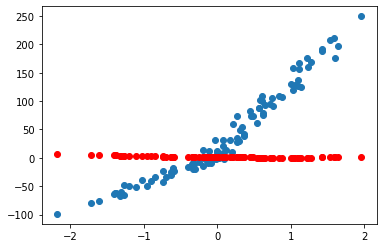

In [422]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

In [423]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [424]:
cost_function(X, y, theta)

3962.7183436692794

In [425]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [426]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [427]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [428]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[19.39248026],
       [88.71257333],
       [18.00732299]])

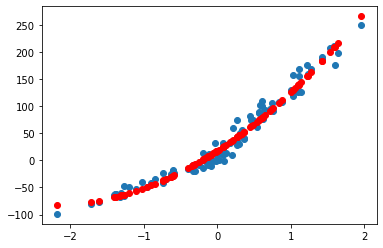

In [429]:
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

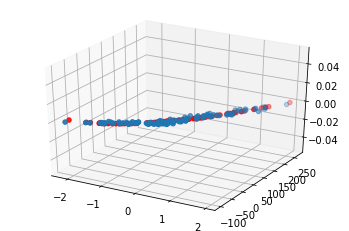

In [430]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
ax.scatter(x, y)
ax.scatter(x, predictions, c='r')

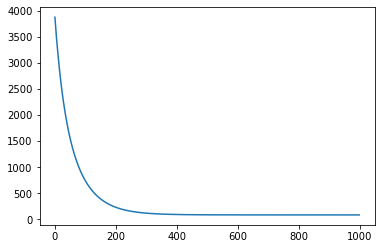

In [431]:
plt.plot(range(n_iterations), cost_history)

In [432]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [345]:
coef_determination(y, predictions)

0.9750133389804763